### Laboratory: Energy calibration of a spectrum using a triple alpha source

In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
plt.style.use('ggplot')

### 2. Read Data

In [3]:
df = pd.read_csv('lab2.csv')
data = df.copy()
x = data['channel']
y = data['counts']

### 3. Plot data

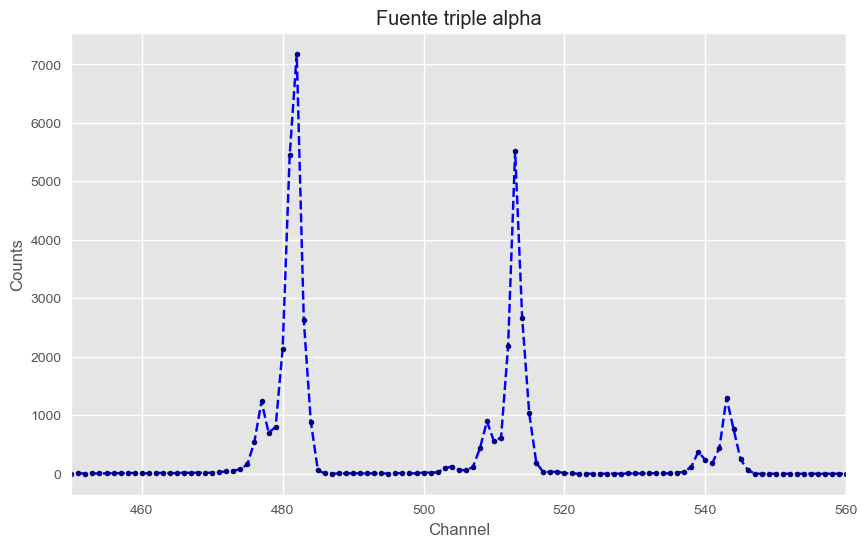

In [4]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x,y, 'bo--', ms=4, mfc='navy')
ax.set_xlim(450,560)
plt.title("Fuente triple alpha")
plt.xlabel(r'Channel')
plt.ylabel(r'Counts')
plt.show()

### 4. Manipulating the data to adjust and extract the parameters

The objective here is to know the centroid of the Gaussian in order to perform the linear calibration in energy.

+ Gaussian fit of the data
$$ G(x,A,\mu,\sigma) = Ae^{-(x-\mu)^{2} / 2\sigma^{2}} $$
$$ A = \frac{1}{\sqrt{2\pi}\sigma}$$


![Gauss Distribution](gauss.png)

In [21]:
# Defining the gaussian function to fit
def gauss_f(x,A,mu,sig):
    return A * np.exp( -(x-mu) **2 / (2 * sig ** 2))

We select the first peak corresponding to Pu-239 to fit a Gaussian to it.

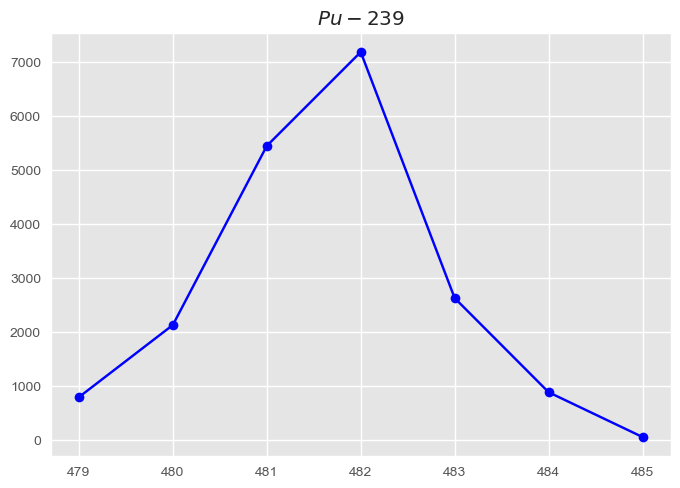

In [22]:
x_pu239 = x[(x>478) & (x<486)]
y_pu239 = y[(x>478) & (x<486)]
plt.plot(x_pu239,y_pu239,'bo-')
plt.title(r"$Pu-239$")
plt.show()

We make the adjustment with the __curve_fit__ function of the __scipy__ library.

In [23]:
popt1, pcov1 = curve_fit(gauss_f, x_pu239, y_pu239, p0 = [7000, 482, 1])

# Mostramos los parámetros del ajuste 
print(f"Parámetros del ajuste: {popt1}")
print(f"Matriz de covarianza:\n {pcov1}")

Parámetros del ajuste: [7.14676989e+03 4.81661954e+02 1.02957801e+00]
Matriz de covarianza:
 [[ 1.96056234e+05 -5.94517704e-02 -1.89072799e+01]
 [-5.94517704e-02  5.40955787e-03  1.53697260e-05]
 [-1.89072799e+01  1.53697260e-05  5.44454944e-03]]


In [24]:
# Incertidumbre de los parámetros
err1 = np.sqrt(np.diag(pcov1))
print(f"Amplitud: {popt1[0]:.2f} +- {err1[0]:.2f}")
print(f"centroide: {popt1[1]:.2f} +- {err1[1]:.2f}")
print(f"sigma: {popt1[2]:.2f} +- {err1[2]:.2f}")

Amplitud: 7146.77 +- 442.78
centroide: 481.66 +- 0.07
sigma: 1.03 +- 0.07


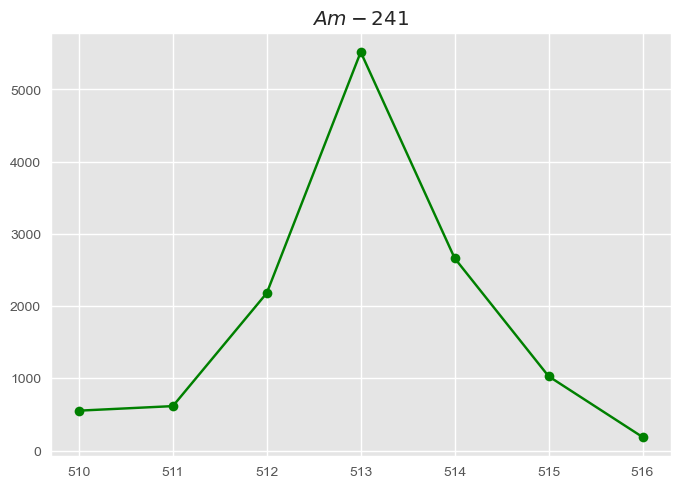

In [25]:
x_am241 = x[(x>509) & (x<517)]
y_am241 = y[(x>509) & (x<517)]
plt.plot(x_am241,y_am241,'go-')
plt.title(r"$Am-241$")
plt.show()

In [26]:
popt2, pcov2 = curve_fit(gauss_f, x_am241, y_am241, p0 = [6000, 513, 1])
print(f"{popt2}")

[5.32897545e+03 5.13074327e+02 8.54924169e-01]


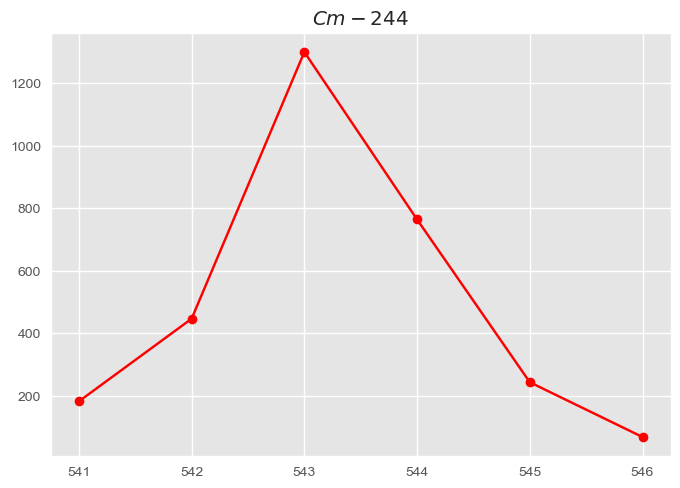

In [27]:
x_cm244 = x[(x>540) & (x<547)]
y_cm244 = y[(x>540) & (x<547)]
plt.plot(x_cm244,y_cm244,'ro-')
plt.title(r"$Cm-244$")
plt.show()

In [28]:
popt3, pcov3 = curve_fit(gauss_f, x_cm244, y_cm244, p0 = [1300, 543, 1])
print(f"{popt3}")

[1.27101838e+03 5.43181406e+02 8.82985264e-01]


In [35]:
energy = np.array([5155, 5486, 5805])
arr = np.array([])
mean_channel = np.append(arr, [popt1[1], popt2[1], popt3[1]]).round(2)

# Canales medios obtenidos que se corresponden con las energías de los tres picos de la fuente de calibración
print(f"Mean channels (centroid): {mean_channel}")

Mean channels (centroid): [481.66 513.07 543.18]


+ Mostrando como se ve el ajuste de forma gráfica

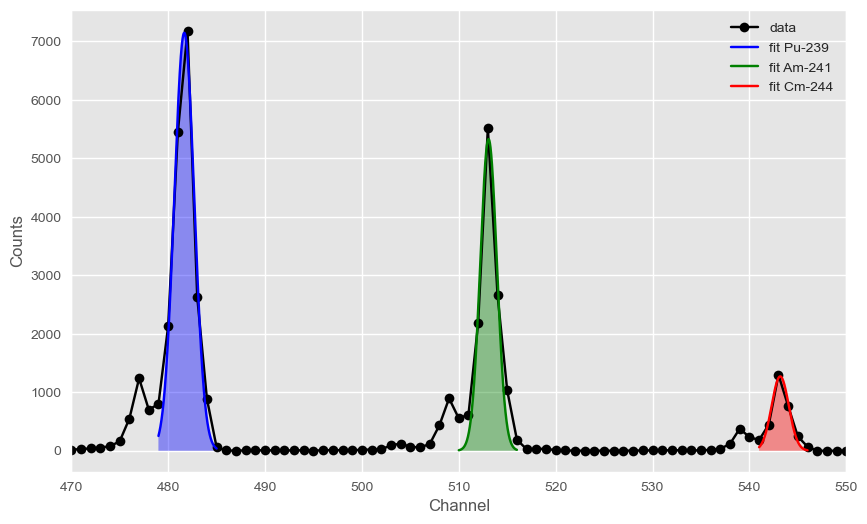

In [30]:
x_model_pu239 = np.linspace(min(x_pu239), max(x_pu239),1000)
x_model_am241 = np.linspace(min(x_am241), max(x_am241),1000)
x_model_cm244 = np.linspace(min(x_cm244), max(x_cm244),1000)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y, 'ko-', label='data')
ax.plot(x_model_pu239, gauss_f(x_model_pu239,*popt1), 'b-', label='fit Pu-239')
ax.plot(x_model_am241, gauss_f(x_model_am241,*popt2), 'g-', label='fit Am-241')
ax.plot(x_model_cm244, gauss_f(x_model_cm244,*popt3), 'r-', label='fit Cm-244')
ax.fill_between(x_model_pu239, gauss_f(x_model_pu239,*popt1), 0, color="b", alpha=0.4, ls='--', lw=0.05)
ax.fill_between(x_model_am241, gauss_f(x_model_am241,*popt2), 0, color="g", alpha=0.4, ls='--', lw=0.05)
ax.fill_between(x_model_cm244, gauss_f(x_model_cm244,*popt3), 0, color="r", alpha=0.4, ls='--', lw=0.05)
ax.set_xlim(470,550)
plt.xlabel(r'Channel')
plt.ylabel(r'Counts')
plt.legend()
plt.show()

### 5.Ajuste lineal

+ Para el ajuste realizar el ajuste lineal correspondiente a la calibración en energía de la fuente triple alfa conocemos los datos del canal y la energía asociada.

|Canal|Energy(keV)|
|----|----|
| 481.66 | 5155 |
| 513.07 | 5486 |
| 543.18 | 5805 |

In [36]:
def linear(x,m,n):
    return m * x + n

In [37]:
popt_l, pcov_l = curve_fit(linear, mean_channel, energy, p0 = [1,1])
print(popt_l)
print(mean_channel, " ", energy)

[10.56547104 65.75214481]
[481.66 513.07 543.18]   [5155 5486 5805]


#### Reportando las incertidumbres


+ __Using covariance matrix__

In [38]:
# Incertidumbre de los parámetros
err = np.sqrt(np.diag(pcov_l))
print(f"Slope: {popt_l[0]:.2f} +- {err[0]:.2f}")
print(f"Intercept: {popt_l[1]:.2f} +- {err[1]:.2f}")

Slope: 10.57 +- 0.02
Intercept: 65.75 +- 8.36


+ __Using residuals and Sum Squared Residuals (SSE) and Total sum of Squared Deviations (SST)__

El coeficiente de determinación $R^{2}$ se relaciona con los siguientes de términos de la siguente forma:  
$R^{2} =1 - \frac{SSE}{SST}$  
donde:  
* Sum of squared Residuals $SSE = (y_{i}-\^y)^2$
* Total sum of squared deviation $SST = (y_{i}-\=y)^2$

In [39]:
# Coeficiente de determinación o bondad de ajuste
energy_fit = mean_channel * popt_l[0] + popt_l[1]
sse = sum((energy - energy_fit) ** 2)
sst = sum((energy - np.average(energy)) ** 2)
R_squared = 1 - sse/sst
print("R_squared: ",R_squared.round(6))

R_squared:  0.999998


+ Coeficiente de determinación usando la matriz de correlación

Coeficiente de determinación: $R^{2} = [Cor(Y,X)]^{2}$,     donde $Cor(Y,X)=\frac{Cov(Y,X)}{\sqrt{Cov(X,X)Cov(Y,Y)}}$


In [53]:
def r_squared(x,y):
    return np.corrcoef(x,y)[0, 1] ** 2

print(f"R-squared: {r_squared(mean_channel, energy):.6f}")

R-squared: 0.999998


### 6. Results

* Energy Calibration

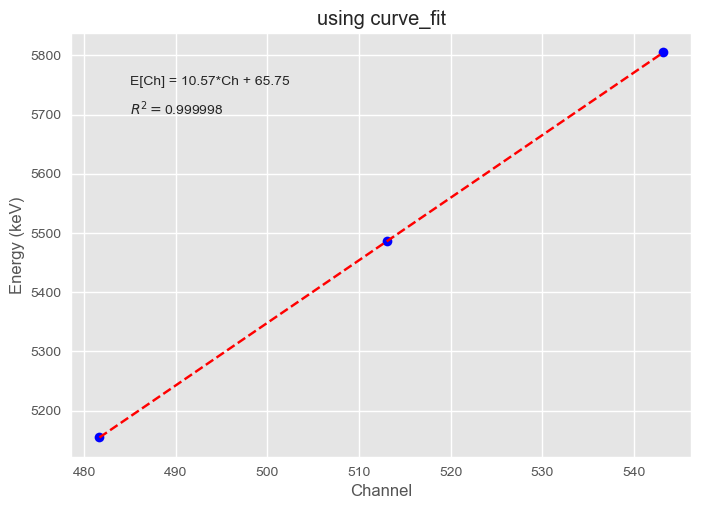

In [50]:
x = np.linspace(mean_channel.min(),mean_channel.max(),1000)

fig, ax = plt.subplots()
ax.plot(mean_channel, energy, c='b', marker='o', ls="")
ax.plot(x, linear(x, popt_l[0], popt_l[1]), 'r--')
plt.ylabel(r'Energy (keV)')
plt.xlabel(r'Channel')
plt.title(r"using curve_fit")
ax.text(485,5750,f"E[Ch] = {popt_l[0]:.2f}*Ch + {popt_l[1]:.2f}")
ax.text(485,5700,f"$R^{2}=${R_squared.round(6)}")
plt.show()

* ### __Triple alpha source calibration Spectra__

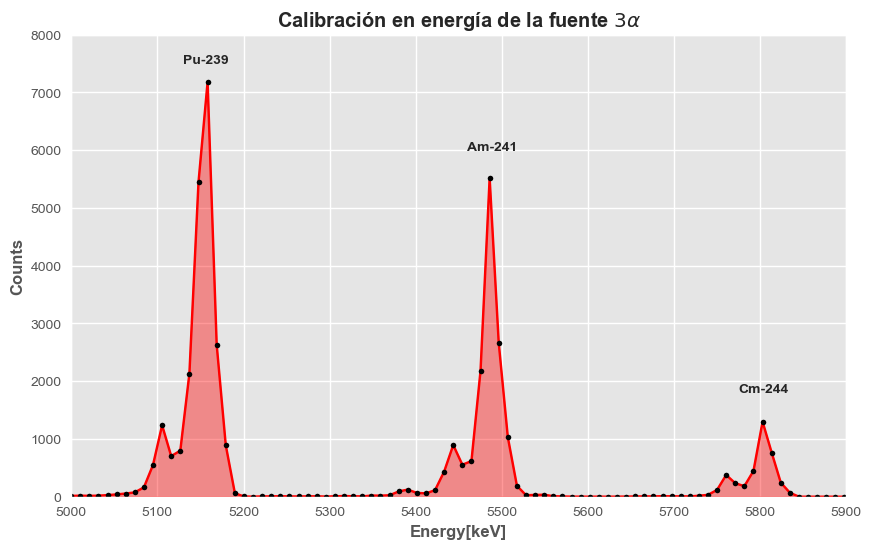

In [52]:
df['energy_l'] = df['channel'] * popt_l[0] + popt_l[1]
energy_l = df['energy_l']
counts_l = df['counts']
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(energy_l, counts_l, 'ro-', ms=4, mfc='k')
ax.fill_between(energy_l, counts_l, 0, color="r", alpha=0.4, linestyle="")
ax.set_xlim(5000,5900)
ax.set_ylim(0,8000)
ax.text(5130,7500,f"Pu-239", weight='bold')
ax.text(5460,6000,f"Am-241", weight='bold')
ax.text(5775,1800,f"Cm-244", weight='bold')
plt.title(r"Calibración en energía de la fuente $3\alpha$", weight='bold')
plt.xlabel(r'Energy[keV]',weight='bold')
plt.ylabel(r'Counts', weight='bold')
plt.show()

### 7. References

+ Data Analysis. Statistical and Computational Methods for Scientists and Engineers. Fourth Edition. Springer
+ Regression Analysis by Example, Wiley Series
+ Practical Statistics for Data Scientist, O'Reilly